This notebook use mcvine.phonon.powderSQE.from_phonon_data_dir.
The calculation produces pretty good result. However, it seems that we may need more points at qx and qy directions, or we should use a random sampling of the Q space (MC).

In [1]:
import numpy as np, os, glob

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
import histogram.hdf as hh, histogram as H

In [4]:
workdir = '_tmp.model-coherent-SQE'
!mkdir -p {workdir}
%cd {workdir}

/home/lj7/dv/mcvine/phonon/tests/phonon/_tmp.model-coherent-SQE


# Force constants

In [6]:
ls ../../data/graphite/

FORCE_CONSTANTS  POSCAR  SPOSCAR


## From SPOSCAR and POSCAR we can know supercell grid

In [7]:
!head -n 10 ../../data/graphite/SPOSCAR

C
   1.0
    14.6771349835800002    0.0000000000000000    0.0000000000000000
    -7.3385674918200010   12.7107717505800011    0.0000000000000000
     0.0000000000000000    0.0000000000000000    6.6542290476200003
 144
Direct
  0.0000000000000000  0.0000000000000000  0.2500000000000000
  0.1666666666666667  0.0000000000000000  0.2500000000000000
  0.3333333333333333  0.0000000000000000  0.2500000000000000


In [8]:
cat ../../data/graphite//POSCAR

C
    1.0
       2.44618916393 0.00000000000   0.00000000000           
      -1.22309458197 2.11846195843   0.00000000000
       0.00000000000   0.00000000000 6.65422904762 
  4
Direct
        0.00000000 0.00000000 0.25000000
        0.00000000 0.00000000 0.75000000
        0.33333333 0.66666667 0.25000000
        0.66666667 0.33333333 0.75000000


In [6]:
6*6*4

144

# Compute phonon data

In [44]:
%%time
from mcvine.phonon.from_phonopy import make_all
!mkdir -p phonon
%cd phonon
!cp ../../data/graphite/* .

make_all(
    species=['C'], supercell_dims=[6,6,1],
    qgrid_dims=[101,101,31],
    fix_pols_phase=True,
    force_constants='FORCE_CONSTANTS', poscar='POSCAR',
)
%cd -

/SNS/users/lj7/simulations/ARCS/graphite/model-coherent-SQE/phonon
cp: omitting directory '/SNS/users/lj7/simulations/samples/graphite/dispersions/dos'
* Constructing Q array
* Calling phonopy to compute eigen values and eigen vectors
* Writing out freqencies
* Fixing and writing out polarizations
* Fixing phase: exp(-i Q.d)
203.120864564
/SNS/users/lj7/simulations/ARCS/graphite/model-coherent-SQE
CPU times: user 10min 19s, sys: 15min 35s, total: 25min 54s
Wall time: 2min 35s


# Compute IQE

In [47]:
import mcvine.phonon.powderSQE as mpp
reload(mpp)

<module 'mcvine.phonon.powderSQE' from '/home/lj7/dv/mcvine/export/lib/python2.7/site-packages/mcvine/phonon/powderSQE.py'>

In [ ]:
%%time
from mcvine.phonon.powderSQE import from_phonon_data_dir
IQEhist = from_phonon_data_dir(
    'phonon', 
    max_hkl=25,
    Q_bins=np.arange(0, 22, 0.1), E_bins=np.arange(0,250, .5)
)

[-10   3  -6]
[-10   3  -5]
[-10   3  -4]
[-10   3  -3]
[-10   3  -2]
[-10   3  -1]
[-10   3   0]
[-10   3   1]
[-10   3   2]
[-10   3   3]
[-10   3   4]
[-10   3   5]
[-10   3   6]
[-10   4  -8]
[-10   4  -7]
[-10   4  -6]
[-10   4  -5]
[-10   4  -4]
[-10   4  -3]
[-10   4  -2]
[-10   4  -1]
[-10   4   0]
[-10   4   1]
[-10   4   2]
[-10   4   3]
[-10   4   4]
[-10   4   5]
[-10   4   6]
[-10   4   7]
[-10   4   8]
[-10   5  -9]
[-10   5  -8]
[-10   5  -7]
[-10   5  -6]
[-10   5  -5]
[-10   5  -4]
[-10   5  -3]
[-10   5  -2]
[-10   5  -1]
[-10   5   0]
[-10   5   1]
[-10   5   2]
[-10   5   3]
[-10   5   4]
[-10   5   5]
[-10   5   6]
[-10   5   7]
[-10   5   8]
[-10   5   9]
[-10   6  -8]
[-10   6  -7]
[-10   6  -6]
[-10   6  -5]
[-10   6  -4]
[-10   6  -3]
[-10   6  -2]
[-10   6  -1]
[-10   6   0]
[-10   6   1]
[-10   6   2]
[-10   6   3]
[-10   6   4]
[-10   6   5]
[-10   6   6]
[-10   6   7]
[-10   6   8]
[-10   7  -6]
[-10   7  -5]
[-10   7  -4]
[-10   7  -3]
[-10   7  -2]
[-10  

[ -6   5 -19]
[ -6   5 -18]
[ -6   5 -17]
[ -6   5 -16]
[ -6   5 -15]
[ -6   5 -14]
[ -6   5 -13]
[ -6   5 -12]
[ -6   5 -11]
[ -6   5 -10]
[-6  5 -9]
[-6  5 -8]
[-6  5 -7]
[-6  5 -6]
[-6  5 -5]
[-6  5 -4]
[-6  5 -3]
[-6  5 -2]
[-6  5 -1]
[-6  5  0]
[-6  5  1]
[-6  5  2]
[-6  5  3]
[-6  5  4]
[-6  5  5]
[-6  5  6]
[-6  5  7]
[-6  5  8]
[-6  5  9]
[-6  5 10]
[-6  5 11]
[-6  5 12]
[-6  5 13]
[-6  5 14]
[-6  5 15]
[-6  5 16]
[-6  5 17]
[-6  5 18]
[-6  5 19]
[-6  5 20]
[-6  5 21]
[-6  5 22]
[ -6   6 -21]
[ -6   6 -20]
[ -6   6 -19]
[ -6   6 -18]
[ -6   6 -17]
[ -6   6 -16]
[ -6   6 -15]
[ -6   6 -14]
[ -6   6 -13]
[ -6   6 -12]
[ -6   6 -11]
[ -6   6 -10]
[-6  6 -9]
[-6  6 -8]
[-6  6 -7]
[-6  6 -6]
[-6  6 -5]
[-6  6 -4]
[-6  6 -3]
[-6  6 -2]
[-6  6 -1]
[-6  6  0]
[-6  6  1]
[-6  6  2]
[-6  6  3]
[-6  6  4]
[-6  6  5]
[-6  6  6]
[-6  6  7]
[-6  6  8]
[-6  6  9]
[-6  6 10]
[-6  6 11]
[-6  6 12]
[-6  6 13]
[-6  6 14]
[-6  6 15]
[-6  6 16]
[-6  6 17]
[-6  6 18]
[-6  6 19]
[-6  6 20]
[-6  6 21]

plot z in (0.0, 63019990.9857)


<IPython.core.display.Javascript object>


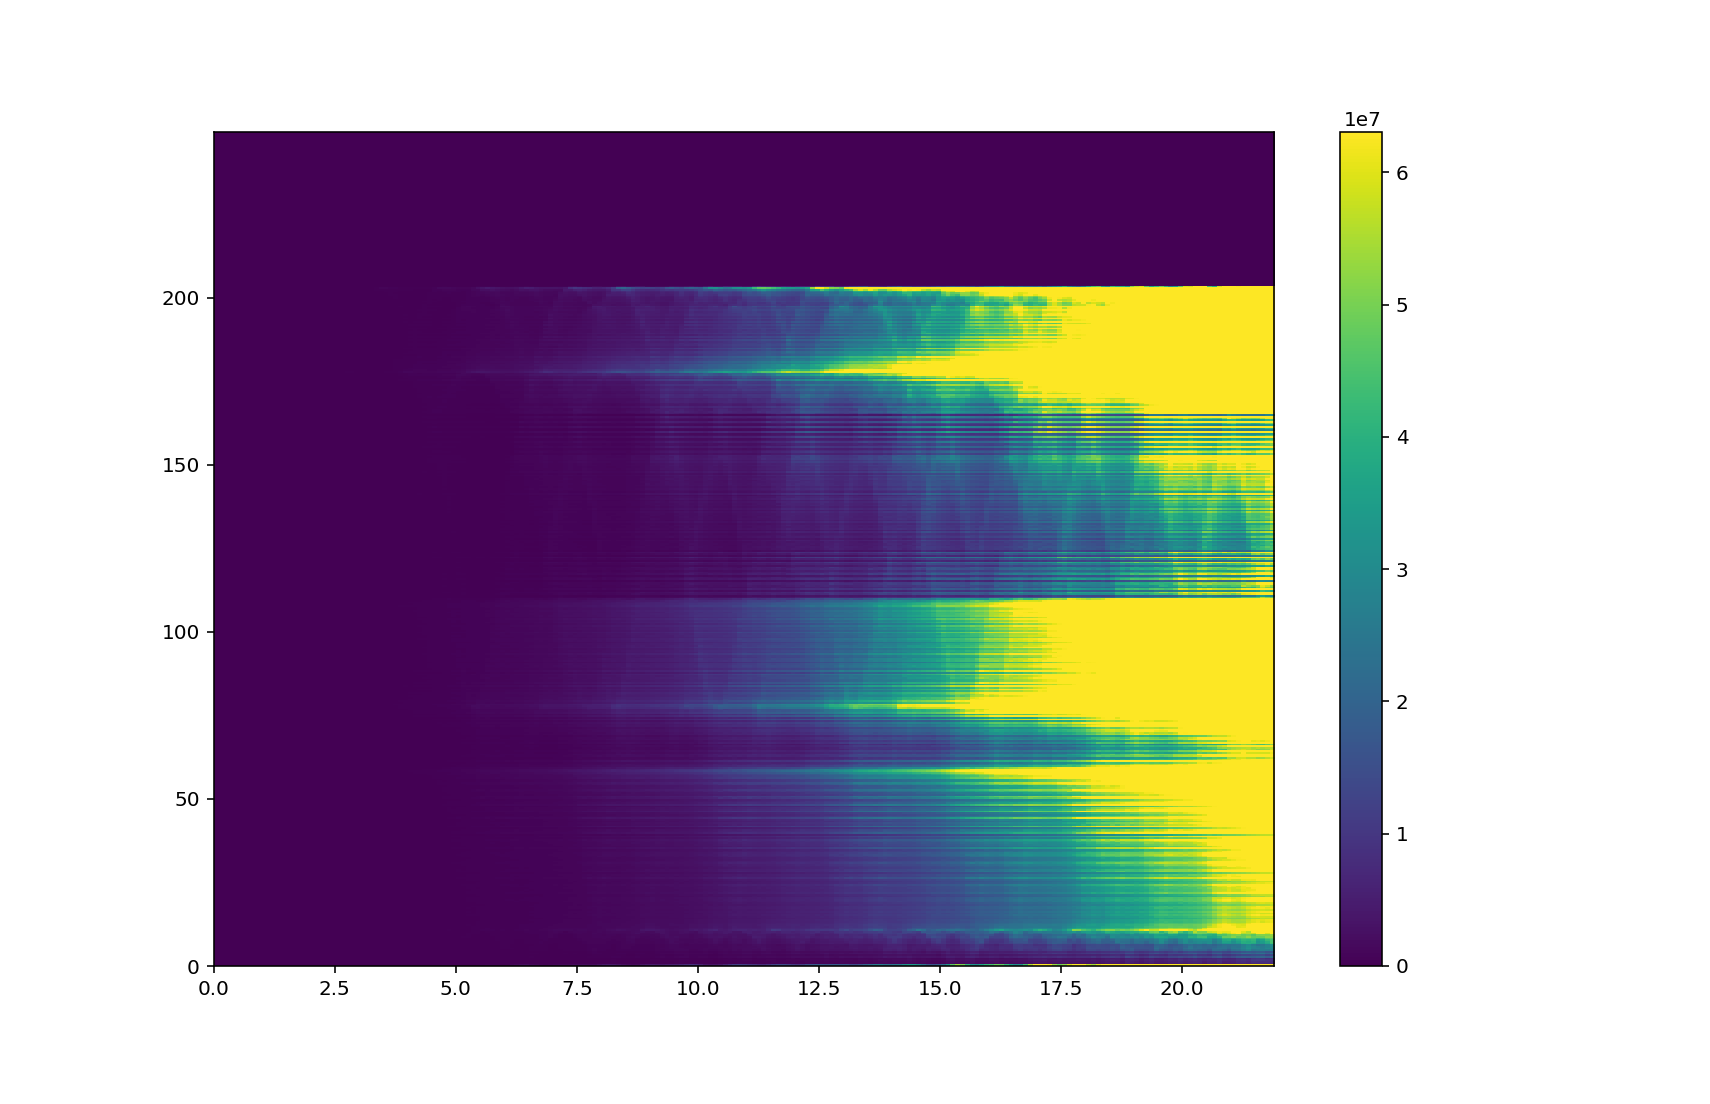

In [50]:
H.plot(IQEhist)

plot z in (0, 2)


<IPython.core.display.Javascript object>


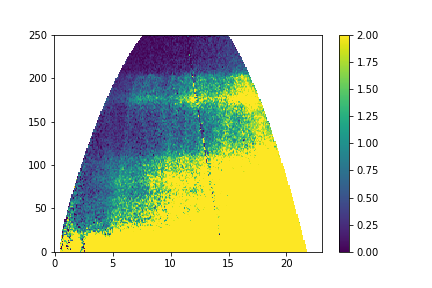

In [29]:
H.plot(hh.load('/SNS/users/lj7/simulations/ARCS/graphite/getdos-non-Rad-300meV/iqe-interped.h5')[(0,23), (0,250)], min=0, max=2)